In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download en_core_web_sm # en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy # contains model which we are going to use
from spacy import displacy # to display along with tag
import pandas as pd

In [ ]:
df = pd.read_csv('apple.txt',on_bad_lines='skip') # to load txt file with read_csv() keep on_bad_lines='skip'

In [ ]:
df # Reviews of customers on apple product

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [ ]:
# how to convert these tabular sentences to paragraph for a corpus?

In [ ]:
df['x']# x is a column name

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [ ]:
# we want to join all these sentences.

In [ ]:
nlp = spacy.load('en_core_web_sm') #model name is en_core_web_sm, nlp will now have entire NER model
# en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

In [ ]:
nlp.pipe_names # shows which different models are present inside en_core_web_sm model

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
# we want ner (name entity recognition)

doc = nlp('Mr.Elon is going to acquire Twitter Inc of $45 billion in 2023')

In [ ]:
doc.ents# ents - will display all entities

(Elon, Twitter Inc, 45, 2023)

In [ ]:
for i in doc.ents:
  print(i, '|', i.label_)

Elon | PERSON
Twitter Inc | ORG
$45 billion | MONEY
2023 | DATE


In [ ]:
doc1 = nlp('Elon Musk is going to acquire Twitter Inc of $45 billion in 2023') #Put Musk in front of Elon

In [ ]:
for i in doc1.ents:
  print(i, '|', i.label_)

Elon Musk | PERSON
Twitter Inc | ORG
$45 billion | MONEY
2023 | DATE


Spacy library is not 100 % precise

In [ ]:
# to display graphical representation for tags
displacy.render(doc,style='ent',jupyter=True) # ent - entity, In Jupyter instead of serve() try render()

In [ ]:
df.iloc[0] # will extract 0 index row

,0
x,It's amazing..... battery last around 10 -12 h...


In [ ]:
# To see index 0 row completely:
pd.set_option('display.max_colwidth',None)
# max_colwidth: will display all text in col., max_rows: to display all rows, None: Display all

In [ ]:
df

,x
0,It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n
1,"Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues). you need to spend extra for an external CD writer and tp buy a carry bag. Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where. you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent ! Marketing strategy for Indian market, if at all has been planned, has been very bad. If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India. Presently, it doesn't seem to be happening.Overall Verdict.If compatibility issues mentioned above do not bother you, go for it. Else, think hard. If its an emotional issue to own a long cherished Mac, then its a different thing. Go ahead and gradually you would figure out most (but not all) of the above problems, like I did.\n"
2,"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk\n"
3,Pros:1. Light weight and super fast response time2. Highly optimize which avoids any kind of process lag.3. Beautiful looks and feels like a prime product.4. Long battery life and awesome sound clarity5. Purchased during Amazon sale cost around 52k.Cons:1. Not enough memory2. Limited softwares available3. Operating system is not that user-friendlyProbably one of the best option for 50k+ laptops\n
4,""""
5,"I am very upset about the product as I checked my MacBook 15 days back in December, it didn’t start. It was luckily in warranty . I took it to the service centre and they informed me the mother board and battery collapsed. If it was not in warranty I had to pay 47000/. I asked for replacement of the product and I was refused. They got it fixed for me. I don’t know why should I pay 57000/ for Mac quality. If this is the quality and the service, then I have to go to other product. In January my product expiry was due. They have give an extension of 3 months warranty when I had asked for 1 year. Very disappoin

In [ ]:
# joining all sentences of dataset
txt = ' '.join(df['x']) # with space join all sentences in x
txt

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n             Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you mast

In [ ]:
x = nlp(txt)

In [ ]:
displacy.render(x,style='ent') # 70 tp 80% accurate model

# **Word Cloud**

In [ ]:
#!pip install WordCloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

A word cloud is a visualization technique for text data where the most frequent word is shown in the biggest font size.


You can create Customized Word Cloud in python. Refer documentation

Text(0.5, 1.0, 'WordCloud')

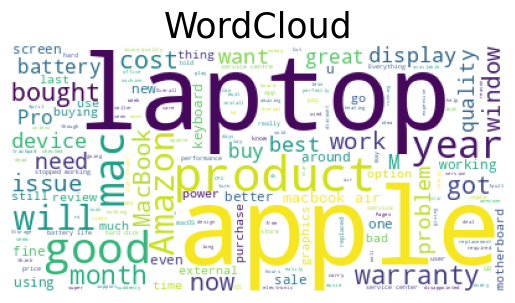

In [ ]:
wc = WordCloud(background_color='white').generate(txt)
plt.imshow(wc)#image show
plt.axis('off')
plt.title("WordCloud",size=25)
# bigger the name of word more the frequency of that word in that corpus
# font of apple, laptop is huge i.e. it is occuring many times in text
# word cloud is important when we are analysing the data when we build Naive bias text classification.
# This is how we can create word cloud

How to build an NLP pipeline

Step1: Sentence Segmentation
Sentence Segment is the first step for building the NLP pipeline. It breaks the paragraph into separate sentences.

Step2: Word Tokenization
Word Tokenizer is used to break the sentence into separate words or tokens.

Step3: Stemming
Stemming is used to normalize words into its base form or root form. For example, celebrates, celebrated and celebrating, all these words are originated with a single root word "celebrate." The big problem with stemming is that sometimes it produces the root word which may not have any meaning.

Step 4: Lemmatization
Lemmatization is quite similar to the Stemming. It is used to group different inflected forms of the word, called Lemma. The main difference between Stemming and lemmatization is that it produces the root word, which has a meaning.

Step 5: Identifying Stop Words
In English, there are a lot of words that appear very frequently like "is", "and", "the", and "a". NLP pipelines will flag these words as stop words. Stop words might be filtered out before doing any statistical analysis.

Step 6: Dependency Parsing
Dependency Parsing is used to find that how all the words in the sentence are related to each other.

Step 7: POS tags
POS stands for parts of speech, which includes Noun, verb, adverb, and Adjective. It indicates that how a word functions with its meaning as well as grammatically within the sentences. A word has one or more parts of speech based on the context in which it is used.

Step 8: Named Entity Recognition (NER)
Named Entity Recognition (NER) is the process of detecting the named entity such as person name, movie name, organization name, or location.

